# **Advanced lane line** 
The goals / steps of this project are the following:  

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply the distortion correction to the raw image.  
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view"). 
* Detect lane pixels and fit to find lane boundary.
* Determine curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

The images for camera calibration are stored in the folder called `camera_cal`.  The images in `test_images` are for testing your pipeline on single frames.  The video called `project_video.mp4` is the video your pipeline should work well on.  `challenge_video.mp4` is an extra (and optional) challenge for you if you want to test your pipeline.

If you're feeling ambitious (totally optional though), don't stop there!  We encourage you to go out and take video of your own, calibrate your camera and show us how you would implement this project from scratch!

## Camera Calibration

In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


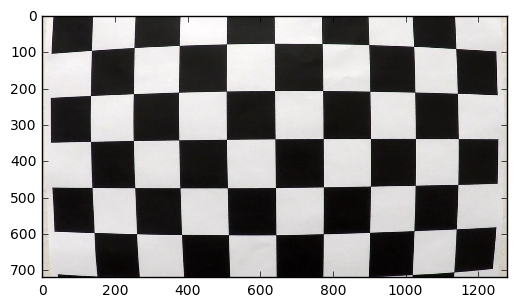

In [2]:
#reading in an image
image = mpimg.imread('camera_cal/calibration1.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray) to show a image

In [3]:
import glob

images = glob.glob('camera_cal/calibration*.jpg')

objpoints = [] #3D points in real world space
imgpoints = [] #2D points in image place

objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

for fname in images:
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

## Apply the distortion correction to the raw image

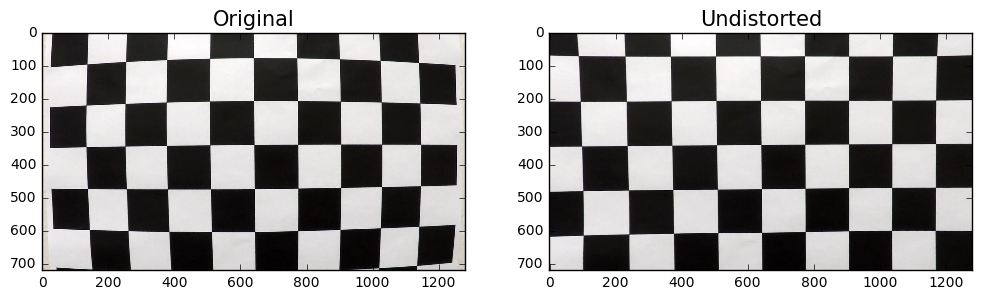

In [4]:
image = mpimg.imread('camera_cal/calibration1.jpg')
undst = cv2.undistort(image, mtx, dist, None, mtx)

f, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 10))
ax1.imshow(image)
ax1.set_title('Original', fontsize=15)
ax2.imshow(undst)
ax2.set_title('Undistorted', fontsize=15)


## Perspective transform

## Use color transforms, gradients, etc., to create a thresholded binary image and then do a perspective transform

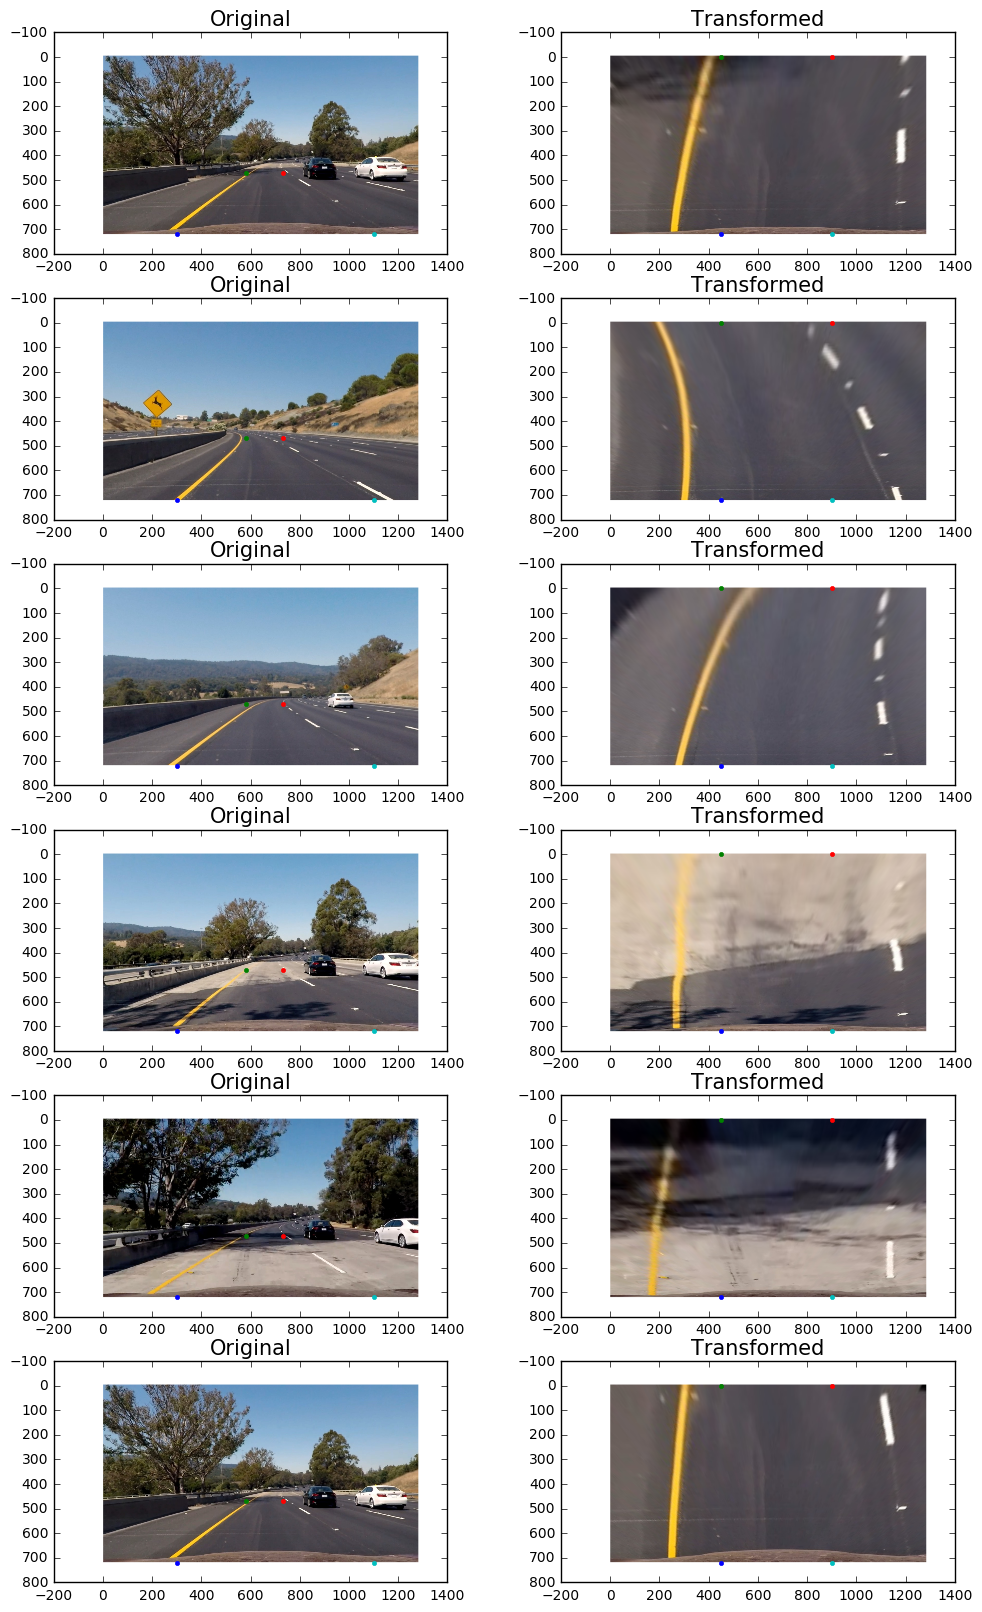

In [88]:
def perspective_transform(undist_image, src, dst, img_size):
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(undist_image, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

image1 = mpimg.imread('test_images/test1.jpg')
undst1 = cv2.undistort(image, mtx, dist, None, mtx)
# src =  np.float32([[240,700],[1130,700],[650,450],[700,450]])
# dst = np.float32([[200,700],[1200,700],[350,50],[1000,50]])

src = np.float32([(300, 720),(580, 470),(730, 470),(1100, 720)])

dst = np.float32([(300, 720),(300, 0),(1100, 0),(1100, 720)])

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12)) = plt.subplots(6, 2, figsize=(12, 20))

#trans_image = cv2.fillConvexPoly(undst, np.array([[270,700],[1130,700],[800,500],[500,520]]), (0,255,0) )

ax1.imshow(undst1)
ax1.plot(300, 720, ".")
ax1.plot(580, 470, ".")
ax1.plot(730, 470, ".")
ax1.plot(1100, 720, ".")
ax1.set_title('Original', fontsize=15)

transformed1 = perspective_transform(undst1, src, dst, (image1.shape[1], image1.shape[0]))
ax2.imshow(transformed1)
ax2.plot(450, 720, ".")
ax2.plot(450, 0, ".")
ax2.plot(900, 0, ".")
ax2.plot(900, 720, ".")
ax2.set_title('Transformed', fontsize=15)

image2 = mpimg.imread('test_images/test2.jpg')
undst2 = cv2.undistort(image2, mtx, dist, None, mtx)
ax3.imshow(undst2)
ax3.plot(300, 720, ".")
ax3.plot(580, 470, ".")
ax3.plot(730, 470, ".")
ax3.plot(1100, 720, ".")
ax3.set_title('Original', fontsize=15)

transformed2 = perspective_transform(undst2, src, dst, (image2.shape[1], image2.shape[0]))
ax4.imshow(transformed2)
ax4.plot(450, 720, ".")
ax4.plot(450, 0, ".")
ax4.plot(900, 0, ".")
ax4.plot(900, 720, ".")
ax4.set_title('Transformed', fontsize=15)

image3 = mpimg.imread('test_images/test3.jpg')
undst3 = cv2.undistort(image3, mtx, dist, None, mtx)
ax5.imshow(undst3)
ax5.plot(300, 720, ".")
ax5.plot(580, 470, ".")
ax5.plot(730, 470, ".")
ax5.plot(1100, 720, ".")
ax5.set_title('Original', fontsize=15)

transformed3 = perspective_transform(undst3, src, dst, (image3.shape[1], image3.shape[0]))
ax6.imshow(transformed3)
ax6.plot(450, 720, ".")
ax6.plot(450, 0, ".")
ax6.plot(900, 0, ".")
ax6.plot(900, 720, ".")
ax6.set_title('Transformed', fontsize=15)

image4 = mpimg.imread('test_images/test4.jpg')
undst4 = cv2.undistort(image4, mtx, dist, None, mtx)
ax7.imshow(undst4)
ax7.plot(300, 720, ".")
ax7.plot(580, 470, ".")
ax7.plot(730, 470, ".")
ax7.plot(1100, 720, ".")
ax7.set_title('Original', fontsize=15)

transformed4 = perspective_transform(undst4, src, dst, (image4.shape[1], image4.shape[0]))
ax8.imshow(transformed4)
ax8.plot(450, 720, ".")
ax8.plot(450, 0, ".")
ax8.plot(900, 0, ".")
ax8.plot(900, 720, ".")
ax8.set_title('Transformed', fontsize=15)

image5 = mpimg.imread('test_images/test5.jpg')
undst5 = cv2.undistort(image5, mtx, dist, None, mtx)
ax9.imshow(undst5)
ax9.plot(300, 720, ".")
ax9.plot(580, 470, ".")
ax9.plot(730, 470, ".")
ax9.plot(1100, 720, ".")
ax9.set_title('Original', fontsize=15)

transformed5 = perspective_transform(undst5, src, dst, (image5.shape[1], image5.shape[0]))
ax10.imshow(transformed5)
ax10.plot(450, 720, ".")
ax10.plot(450, 0, ".")
ax10.plot(900, 0, ".")
ax10.plot(900, 720, ".")
ax10.set_title('Transformed', fontsize=15)

image6 = mpimg.imread('test_images/test6.jpg')
undst6 = cv2.undistort(image6, mtx, dist, None, mtx)
ax11.imshow(undst6)
ax11.plot(300, 720, ".")
ax11.plot(580, 470, ".")
ax11.plot(730, 470, ".")
ax11.plot(1100, 720, ".")
ax11.set_title('Original', fontsize=15)

transformed6 = perspective_transform(undst6, src, dst, (image6.shape[1], image6.shape[0]))
ax12.imshow(transformed)
ax12.plot(450, 720, ".")
ax12.plot(450, 0, ".")
ax12.plot(900, 0, ".")
ax12.plot(900, 720, ".")
ax12.set_title('Transformed', fontsize=15)

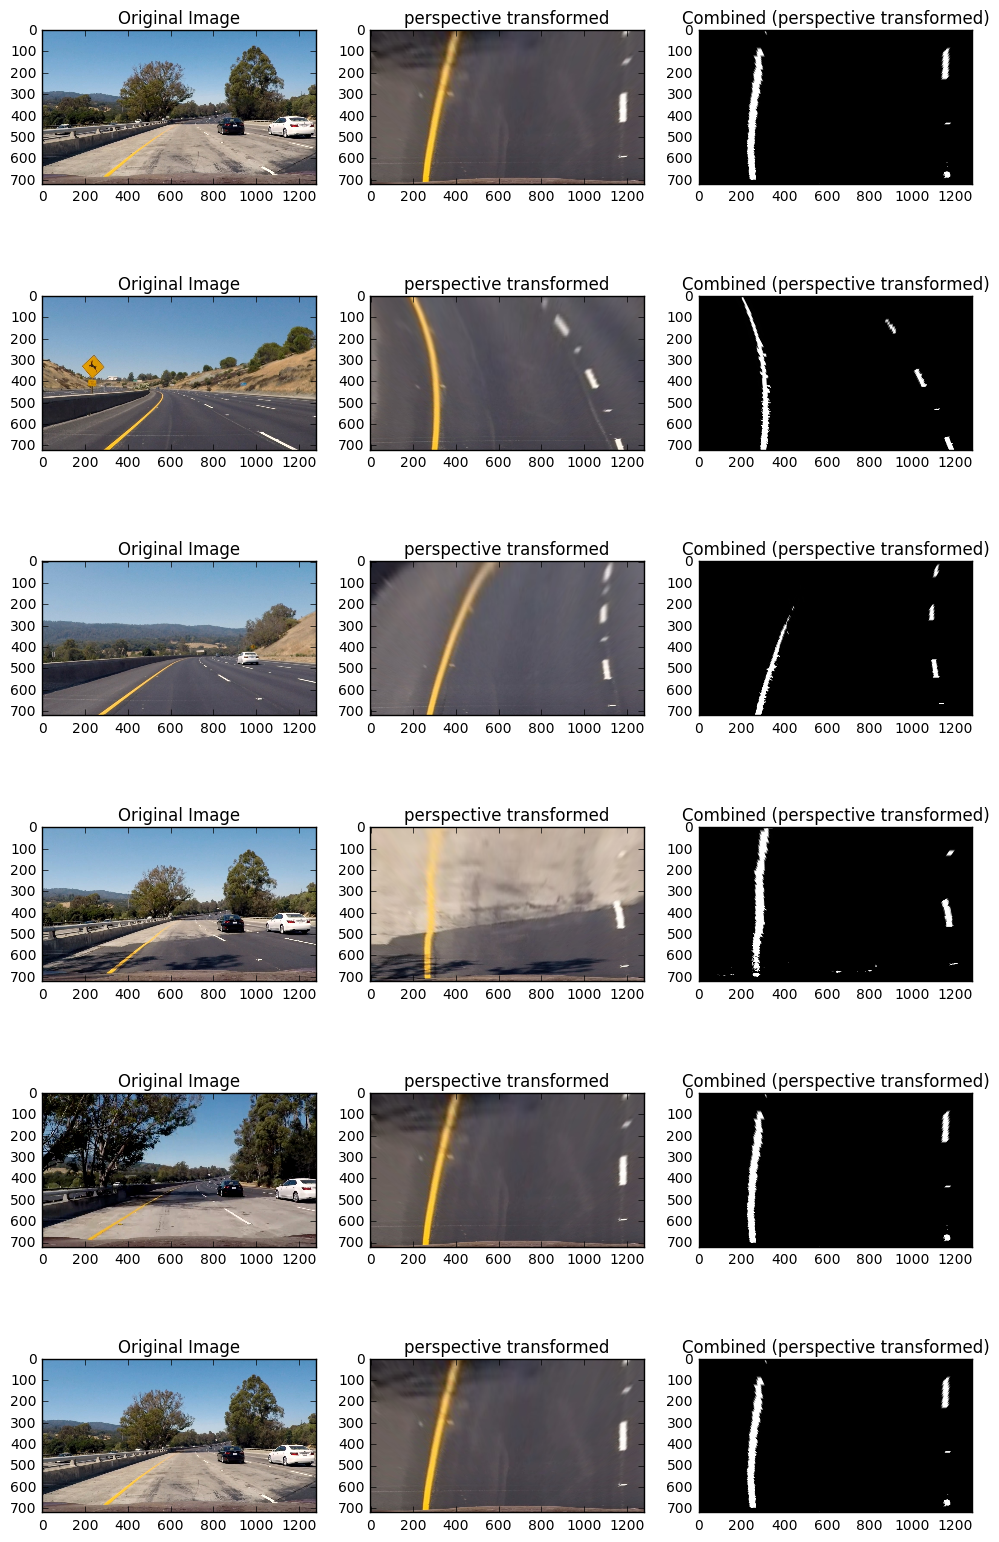

In [214]:
def color_transform(img, s_thresh=(170, 255), sx_thresh=(30, 255)):
    img = np.copy(img)
    
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    yellow = cv2.inRange(hsv, (20, 100, 100), (50, 255, 255))

    white = cv2.inRange(hsv, (200,200,200), (255,255,255))

    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    white_2 = cv2.inRange(hls, (200,200,200), (255,255,255))

    white_3 = cv2.inRange(img, (200,200,200), (255,255,255))

    s_ch = hls[:,:,2]
    retval, s_ch_binary = cv2.threshold(s_ch.astype('uint8'), s_thresh[0], s_thresh[1], cv2.THRESH_BINARY)
    
    v_channel = hls[:,:,2]
    
    # Sobel x
    sobelx = cv2.Sobel(v_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    bit_layer = s_ch_binary | sxbinary | yellow | white | white_2 | white_3   
    
    return s_ch_binary, bit_layer    

_, combined_b1 = color_transform(image1)
#s_b_transformed1 = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
combined_b_transformed1 = perspective_transform(combined_b1, src, dst, (combined_b1.shape[1], combined_b1.shape[0]))

_, combined_b2 = color_transform(image2)
#s_b_transformed1 = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
combined_b_transformed2 = perspective_transform(combined_b2, src, dst, (combined_b2.shape[1], combined_b2.shape[0]))

_, combined_b3 = color_transform(image3)
#s_b_transformed1 = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
combined_b_transformed3 = perspective_transform(combined_b3, src, dst, (combined_b3.shape[1], combined_b3.shape[0]))

_, combined_b4 = color_transform(image4)
#s_b_transformed1 = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
combined_b_transformed4 = perspective_transform(combined_b4, src, dst, (combined_b4.shape[1], combined_b4.shape[0]))

_, combined_b5 = color_transform(image5)
#s_b_transformed1 = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
combined_b_transformed5 = perspective_transform(combined_b5, src, dst, (combined_b5.shape[1], combined_b5.shape[0]))

_, combined_b6 = color_transform(image6)
#s_b_transformed1 = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
combined_b_transformed6 = perspective_transform(combined_b6, src, dst, (combined_b6.shape[1], combined_b6.shape[0]))

f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15), (ax16, ax17, ax18)) = plt.subplots(6, 3, figsize=(12, 20))

ax1.set_title('Original Image')
ax1.imshow(image1)
ax2.set_title('perspective transformed')
ax2.imshow(transformed1)
ax3.set_title('Combined (perspective transformed)')
ax3.imshow(combined_b_transformed1, cmap='gray')

ax4.set_title('Original Image')
ax4.imshow(image2)
ax5.set_title('perspective transformed')
ax5.imshow(transformed2)
ax6.set_title('Combined (perspective transformed)')
ax6.imshow(combined_b_transformed2, cmap='gray')

ax7.set_title('Original Image')
ax7.imshow(image3)
ax8.set_title('perspective transformed')
ax8.imshow(transformed3)
ax9.set_title('Combined (perspective transformed)')
ax9.imshow(combined_b_transformed3, cmap='gray')

ax10.set_title('Original Image')
ax10.imshow(image4)
ax11.set_title('perspective transformed')
ax11.imshow(transformed4)
ax12.set_title('Combined (perspective transformed)')
ax12.imshow(combined_b_transformed4, cmap='gray')

ax13.set_title('Original Image')
ax13.imshow(image5)
ax14.set_title('perspective transformed')
ax14.imshow(transformed1)
ax15.set_title('Combined (perspective transformed)')
ax15.imshow(combined_b_transformed1, cmap='gray')

ax16.set_title('Original Image')
ax16.imshow(image1)
ax17.set_title('perspective transformed')
ax17.imshow(transformed1)
ax18.set_title('Combined (perspective transformed)')
ax18.imshow(combined_b_transformed1, cmap='gray')


## Detect lane pixels and fit to find lane boundary.

In [215]:
import scipy.signal

def transpose_line(combined_b_trans_img):
    xcord_left_line = []
    ycord_left_line = []
    xcord_right_line = []
    ycord_right_line = []

    size = combined_b_trans_img.shape[0]//100
    left_peak = 250
    right_peak = 1200
    
    previous_left_peak = 250
    previous_right_peak = 1200
    left_peak_found = 0
    found_left_peak_value = 250
    right_peak_found = 0
    found_right_peak_value = 1200
    for i in reversed(range(0, 100)):
        start = i * combined_b_trans_img.shape[0]//100
        end = (i + 1) * combined_b_trans_img.shape[0]//100
        histogram = np.sum(combined_b_trans_img[start:end,:], axis=0)
        peaks = np.array(scipy.signal.find_peaks_cwt(histogram, np.array([200])))

        if len(peaks) == 0:
            left_peak = previous_left_peak
            right_peak = previous_right_peak
        elif len(peaks) == 1:
            left_peak = peaks[0]
            previous_left_peak = left_peak
            right_peak = previous_right_peak
            if left_peak_found == 0:
                left_peak_found = 1
                found_left_peak_value = left_peak
        else:
            left_peak = peaks[0]
            right_peak = peaks[1]
            previous_left_peak = left_peak
            previous_right_peak = right_peak
            if left_peak_found == 0:
                left_peak_found = 1
                found_left_peak_value = left_peak
            if right_peak_found == 0:
                right_peak_found = 1
                found_right_peak_value = right_peak

        if left_peak < 150: 
            left_peak = 250
        if left_peak > 700:
            left_peak = 250
        
        if right_peak < 500:
            right_peak = 1200
        if right_peak > 1250:
            right_peak = 1200
            
        xcord_left_line.append(left_peak)
        ycord_left_line.append(int(i * combined_b_trans_img.shape[0] // 100))
        xcord_right_line.append(right_peak)
        ycord_right_line.append(int(i * combined_b_trans_img.shape[0] // 100))

    ycord_left_line = np.array(ycord_left_line)
    xcord_left_line = np.array(xcord_left_line)
    
    ycord_right_line = np.array(ycord_right_line)
    xcord_right_line = np.array(xcord_right_line)

    # Fit a second order polynomial to each lane line
    left_fit = np.polyfit(ycord_left_line, xcord_left_line, 2)
    left_fitx = left_fit[0] * ycord_left_line ** 2 + left_fit[1] * ycord_left_line + left_fit[2]

    right_fit = np.polyfit(ycord_right_line, xcord_right_line, 2)
    right_fitx = right_fit[0] * ycord_right_line ** 2 + right_fit[1] * ycord_right_line + right_fit[2]

    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meteres per pixel in x dimension
    y_eval_left = np.max(ycord_left_line)
    y_eval_right = np.max(ycord_right_line)
    
    left_fit_cr = np.polyfit(ycord_left_line*ym_per_pix, xcord_left_line*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ycord_right_line*ym_per_pix, xcord_right_line*xm_per_pix, 2)
    
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval_left + left_fit_cr[1])**2)**1.5) \
                             /np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval_right + right_fit_cr[1])**2)**1.5) \
                                /np.absolute(2*right_fit_cr[0])
    
    return left_fitx, ycord_left_line, right_fitx, ycord_right_line, left_curverad, right_curverad

print("=====test_image1======")    
left_fitx1, ycord_left_line1, right_fitx1, ycord_right_line1, left_curverad1, right_curverad1 = transpose_line(combined_b_transformed1)
print("=====test_image2======")    
left_fitx2, ycord_left_line2, right_fitx2, ycord_right_line2, left_curverad2, right_curverad2 = transpose_line(combined_b_transformed2)
print("=====test_image3======")     
left_fitx3, ycord_left_line3, right_fitx3, ycord_right_line3, left_curverad3, right_curverad3 = transpose_line(combined_b_transformed3)
print("=====test_image4======")    
left_fitx4, ycord_left_line4, right_fitx4, ycord_right_line4, left_curverad4, right_curverad4 = transpose_line(combined_b_transformed4)
print("=====test_image5======")    
left_fitx5, ycord_left_line5, right_fitx5, ycord_right_line5, left_curverad5, right_curverad5 = transpose_line(combined_b_transformed5)
print("=====test_image6======")    
left_fitx6, ycord_left_line6, right_fitx6, ycord_right_line6, left_curverad6, right_curverad6 = transpose_line(combined_b_transformed6)

=====test_image1======
left peak found 564
right peak found 1156
new-left-peak
564
564
253
252
251
250
249
249
249
248
248
246
246
245
245
245
245
244
243
242
241
241
243
242
242
243
242
242
244
245
245
246
246
247
247
248
248
249
248
248
247
249
251
252
252
253
254
252
252
253
254
256
258
257
257
259
262
263
266
267
267
265
266
266
268
271
275
276
274
274
275
275
275
277
280
281
279
277
278
278
277
275
281
286
285
283
283
280
278
278
278
278
278
278
278
317
315
312
310
308
new-right-peak
1200
1200
1200
1156
1159
1160
1158
1158
1161
1161
1161
1163
1163
1157
1157
1157
1157
1157
1157
1157
1157
1157
1157
1157
1157
1157
1157
1157
1157
1157
1157
1157
1157
1157
1157
1157
1157
1157
1161
1164
1164
1164
1164
1164
1164
1164
1164
1164
1164
1164
1164
1164
1164
1164
1164
1164
1164
1164
1164
1164
1164
1164
1164
1164
1164
1164
1139
1145
1148
1150
1151
1150
1151
1152
1152
1151
1151
1152
1152
1152
1153
1154
1153
1152
1153
1156
1160
1165
1168
1168
1168
1168
1168
1168
1168
1168
1168
1168
1168
1168
=====t

## Warp the detected lane boundaries back onto the original image.

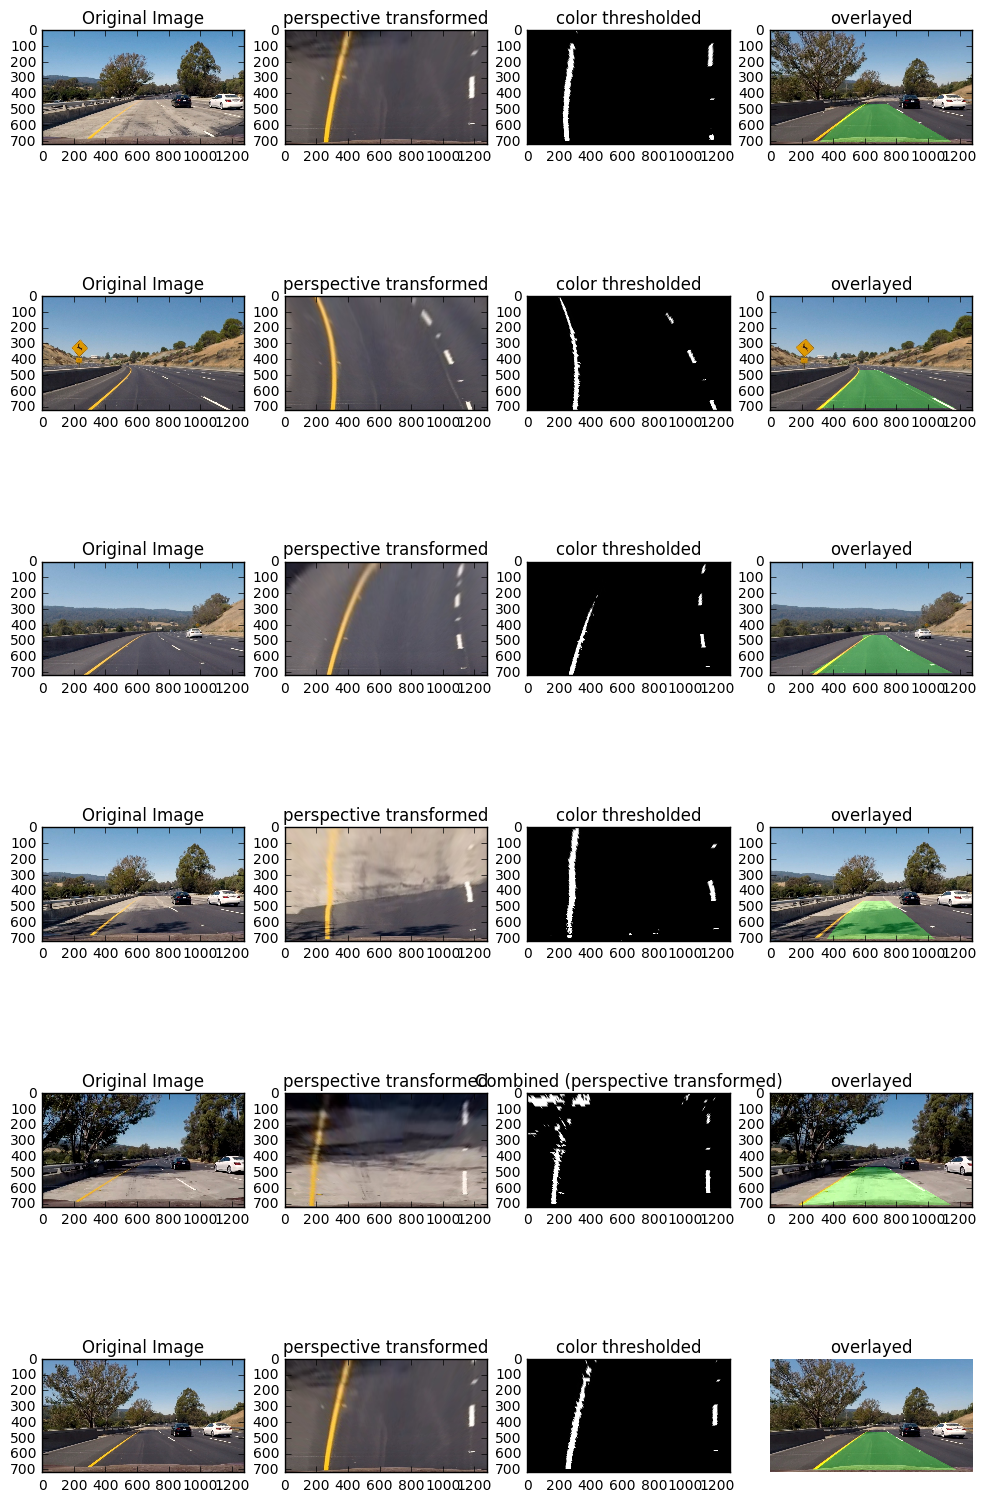

In [216]:
def drawlines(transformed, left_fitx, ycord_left_line, right_fitx, ycord_right_line, src, dst, image, undst):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(combined_b_transformed).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ycord_left_line]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ycord_right_line])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = perspective_transform(color_warp, dst, src , (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undst, 1, newwarp, 0.3, 0)
    return result

r1 = drawlines(combined_b_transformed1, left_fitx1, ycord_left_line1, right_fitx1, ycord_right_line1, src, dst, image1, undst1)
r2 = drawlines(combined_b_transformed2, left_fitx2, ycord_left_line2, right_fitx2, ycord_right_line2, src, dst, image2, undst2)
r3 = drawlines(combined_b_transformed3, left_fitx3, ycord_left_line3, right_fitx3, ycord_right_line3, src, dst, image3, undst3)
r4 = drawlines(combined_b_transformed4, left_fitx4, ycord_left_line4, right_fitx4, ycord_right_line4, src, dst, image4, undst4)
r5 = drawlines(combined_b_transformed5, left_fitx5, ycord_left_line5, right_fitx5, ycord_right_line5, src, dst, image5, undst5)
r6 = drawlines(combined_b_transformed6, left_fitx6, ycord_left_line6, right_fitx6, ycord_right_line6, src, dst, image6, undst6)


f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16), (ax17, ax18, ax19, ax20), (ax21, ax22, ax23, ax24)) = plt.subplots(6, 4, figsize=(12, 20))
plt.axis('off')

ax1.set_title('Original Image')
ax1.imshow(image1)
ax2.set_title('perspective transformed')
ax2.imshow(transformed1)
ax3.set_title('color thresholded')
ax3.imshow(combined_b_transformed1, cmap='gray')
ax4.set_title('overlayed')
ax4.imshow(r1, cmap='gray')

ax5.set_title('Original Image')
ax5.imshow(image2)
ax6.set_title('perspective transformed')
ax6.imshow(transformed2)
ax7.set_title('color thresholded')
ax7.imshow(combined_b_transformed2, cmap='gray')
ax8.set_title('overlayed')
ax8.imshow(r2, cmap='gray')

ax9.set_title('Original Image')
ax9.imshow(image3)
ax10.set_title('perspective transformed')
ax10.imshow(transformed3)
ax11.set_title('color thresholded')
ax11.imshow(combined_b_transformed3, cmap='gray')
ax12.set_title('overlayed')
ax12.imshow(r3, cmap='gray')

ax13.set_title('Original Image')
ax13.imshow(image4)
ax14.set_title('perspective transformed')
ax14.imshow(transformed4)
ax15.set_title('color thresholded')
ax15.imshow(combined_b_transformed4, cmap='gray')
ax16.set_title('overlayed')
ax16.imshow(r4, cmap='gray')

ax17.set_title('Original Image')
ax17.imshow(image5)
ax18.set_title('perspective transformed')
ax18.imshow(transformed5)
ax19.set_title('Combined (perspective transformed)')
ax19.imshow(combined_b_transformed5, cmap='gray')
ax20.set_title('overlayed')
ax20.imshow(r5, cmap='gray')

ax21.set_title('Original Image')
ax21.imshow(image6)
ax22.set_title('perspective transformed')
ax22.imshow(transformed6)
ax23.set_title('color thresholded')
ax23.imshow(combined_b_transformed6, cmap='gray')
ax24.set_title('overlayed')
ax24.imshow(r6, cmap='gray')

## Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [118]:
from moviepy.editor import VideoFileClip

def pipeline(image):
    undst = cv2.undistort(image, mtx, dist, None, mtx)

    s_b, combined_b = color_transform(image)
    #s_b_transformed = perspective_transform(s_b, src, dst, (s_b.shape[1], s_b.shape[0]))
    combined_b_transformed = perspective_transform(combined_b, src, dst, (combined_b.shape[1], combined_b.shape[0]))
    
    left_fitx, ycord_left_line, right_fitx, ycord_right_line, left_curverad, right_curverad = transpose_line(combined_b_transformed)
    r = drawlines(combined_b_transformed, left_fitx, ycord_left_line, right_fitx, ycord_right_line, src, dst, image, undst)
    return r

clip1 = VideoFileClip("project_video.mp4")
project_clip = clip1.fl_image(pipeline)

%time project_clip.write_videofile('project_video_updated.mp4', audio=False)



[MoviePy] >>>> Building video project_video_updated.mp4
[MoviePy] Writing video project_video_updated.mp4


100%|█████████▉| 1260/1261 [41:56<00:02,  2.01s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_updated.mp4 

CPU times: user 59min 48s, sys: 1min 35s, total: 1h 1min 23s
Wall time: 41min 57s
